In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
data = np.load('../assets/proyecto_training_data.npy')
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [41]:
n = len(data)
n80 = int(n * 0.8)

In [42]:
data_training = data[0:n80]
data_testing = data[n80:n]
data_training

array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

In [43]:
training_df = pd.DataFrame(data_training, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
training_df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [55]:
data_df = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
data_df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### Variable 1 OverallQual

In [56]:
X = np.array(data_df['OverallQual']).reshape(-1, 1)
y = np.array(data_df['SalePrice']).reshape(-1, 1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
len(X_train)

1168

In [59]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5599376080106335


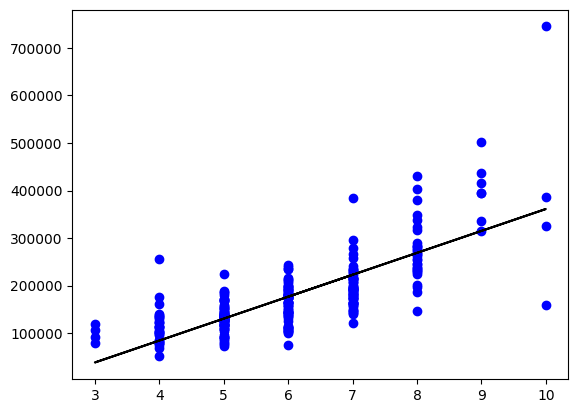

In [60]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [61]:
print('b1:', regr.coef_)
print('b0:', regr.intercept_)

b1: [[46104.53511258]]
b0: [-99930.71721215]


### Variable 2 1stFlrSF

In [64]:
X = np.array(data_df['1stFlrSF']).reshape(-1, 1)
y = np.array(data_df['SalePrice']).reshape(-1, 1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
len(X_train)

1168

In [67]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.37926371765740463


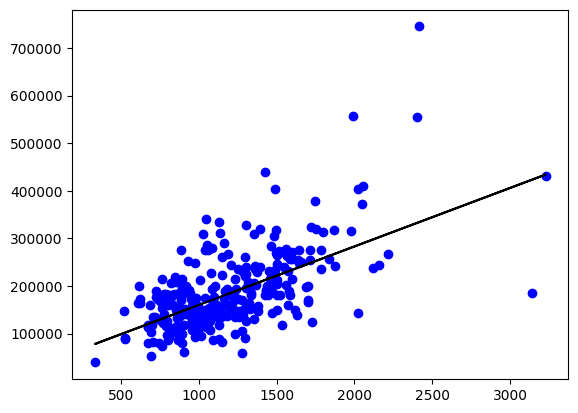

In [69]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [72]:
print('b1:', regr.coef_)
print('b0:', regr.intercept_)

b1: [[122.98854726]]
b0: [37048.15444643]
epocas:  1


AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'